In [1]:
import plotly.tools as tls
tls.set_credentials_file(username='YuweiTu', api_key='KXrlSB9iz8kutUHXd4gp')

In [70]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

import plotly.plotly as py
import plotly.graph_objs as go# interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout 

In [3]:
crime_data = create_engine('sqlite:///crime_data.db')

In [4]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/Users/yuweitu/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.shape

(5101231, 24)

In [6]:
start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_csv('NYPD_Complaint_Data_Historic.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
    df.index += index_start

    j+=1
    print('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))

    df.to_sql('data', crime_data, if_exists='append')
    index_start = df.index[-1] + 1

0 seconds: completed 20000 rows
2 seconds: completed 40000 rows
3 seconds: completed 60000 rows
4 seconds: completed 80000 rows
5 seconds: completed 100000 rows
6 seconds: completed 120000 rows
7 seconds: completed 140000 rows
8 seconds: completed 160000 rows
9 seconds: completed 180000 rows
10 seconds: completed 200000 rows
11 seconds: completed 220000 rows
13 seconds: completed 240000 rows
14 seconds: completed 260000 rows
15 seconds: completed 280000 rows
16 seconds: completed 300000 rows
17 seconds: completed 320000 rows
18 seconds: completed 340000 rows
19 seconds: completed 360000 rows
20 seconds: completed 380000 rows
21 seconds: completed 400000 rows
22 seconds: completed 420000 rows
24 seconds: completed 440000 rows
25 seconds: completed 460000 rows
26 seconds: completed 480000 rows
27 seconds: completed 500000 rows
28 seconds: completed 520000 rows
29 seconds: completed 540000 rows
30 seconds: completed 560000 rows
31 seconds: completed 580000 rows
32 seconds: completed 60000

In [7]:
#preview the table
df = pd.read_sql_query('SELECT * FROM data LIMIT 5', crime_data)
df.head()

,index,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,1,101109527,12/31/2015,23:45:00,None,None,12/31/2015,113,FORGERY,729.0,...,44,INSIDE,BAR/NIGHT CLUB,None,None,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2,153401121,12/31/2015,23:36:00,None,None,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,103,OUTSIDE,None,None,None,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,3,569369778,12/31/2015,23:30:00,None,None,12/31/2015,117,DANGEROUS DRUGS,503.0,...,28,None,OTHER,None,None,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,4,968417082,12/31/2015,23:30:00,None,None,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,105,INSIDE,RESIDENCE-HOUSE,None,None,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,5,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,13,FRONT OF,OTHER,None,None,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [14]:
df_1 = pd.read_sql_query('SELECT KY_CD, COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY KY_CD '
                       'ORDER BY -num_crimes', crime_data)

In [15]:
import matplotlib.pyplot as plt

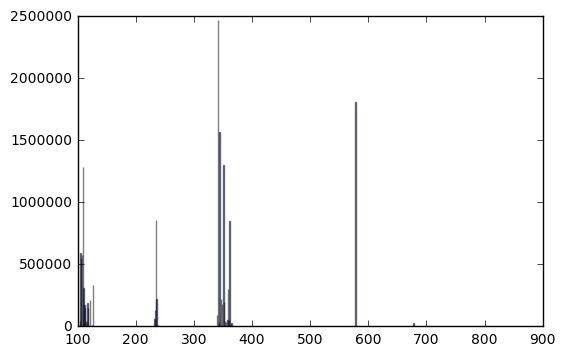

In [16]:
plt.bar(df_1.KY_CD, df_1.num_crimes, align='center', alpha=0.5)
plt.show()

In [21]:
py.iplot([Bar(x=df_1.KY_CD, y=df_1.num_crimes)], filename='Most Common Crimes by KY_CD')

In [53]:
df_2 = pd.read_sql_query('SELECT KY_CD, OFNS_DESC,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY KY_CD '
                       'ORDER BY -num_crimes '
                        'LIMIT 10 ', crime_data)

In [54]:
df_2['KY_CD'] = df_2['KY_CD'].astype('object')

In [55]:
df_2

,KY_CD,OFNS_DESC,num_crimes
0,341,PETIT LARCENY,2467524
1,578,HARRASSMENT 2,1812423
2,344,ASSAULT 3 & RELATED OFFENSES,1564833
3,351,CRIMINAL MISCHIEF & RELATED OF,1300104
4,109,GRAND LARCENY,1287615
5,235,DANGEROUS DRUGS,857403
6,361,OFF. AGNST PUB ORD SENSBLTY &,849306
7,105,ROBBERY,596322
8,107,BURGLARY,574221
9,106,FELONY ASSAULT,552372


In [56]:
py.iplot([Bar(x=df_2.OFNS_DESC, y=df_2.num_crimes)], filename='Top 10 Offense types with KY')

In [58]:
df_3 = pd.read_sql_query('SELECT PD_CD, COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY PD_CD '
                       'ORDER BY -num_crimes', crime_data)

In [59]:
py.iplot([Bar(x=df_3.PD_CD, y=df_3.num_crimes)], filename='Most Common Crimes by PD_CD')

In [61]:
df_4= pd.read_sql_query('SELECT PD_CD, PD_DESC,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY PD_CD '
                       'ORDER BY -num_crimes '
                        'LIMIT 10 ', crime_data)

In [63]:
df_4

,PD_CD,PD_DESC,num_crimes
0,101.0,ASSAULT 3,1314390
1,638.0,"HARASSMENT,SUBD 3,4,5",1104357
2,639.0,AGGRAVATED HARASSMENT 2,843834
3,637.0,"HARASSMENT,SUBD 1,CIVILIAN",707877
4,338.0,"LARCENY,PETIT FROM BUILDING,UN",665202
5,333.0,"LARCENY,PETIT FROM STORE-SHOPL",646338
6,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",566421
7,321.0,"LARCENY,PETIT FROM AUTO",534105
8,567.0,"MARIJUANA, POSSESSION 4 & 5",519132
9,109.0,"ASSAULT 2,1,UNCLASSIFIED",462138


In [62]:
py.iplot([Bar(x=df_4.PD_DESC, y=df_4.num_crimes)], filename='Top 10 Offense types with PD')

In [64]:
df_5= pd.read_sql_query('SELECT CRM_ATPT_CPTD_CD,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY CRM_ATPT_CPTD_CD '
                       'ORDER BY -num_crimes ', crime_data)

In [72]:
py.iplot([go.Pie(labels=df_5.CRM_ATPT_CPTD_CD, values=df_5.num_crimes)], filename='Most Common Crimes by CRM_ATPT_CPTD_CD')

In [77]:
df_6 = pd.read_sql_query('SELECT KY_CD, OFNS_DESC,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'WHERE  CRM_ATPT_CPTD_CD = "ATTEMPTED"'
                        'GROUP BY KY_CD '
                        'ORDER BY -num_crimes ', crime_data)

In [79]:
df_6[:10]

,KY_CD,OFNS_DESC,num_crimes
0,105,ROBBERY,65655
1,107,BURGLARY,40695
2,341,PETIT LARCENY,28863
3,106,FELONY ASSAULT,25788
4,109,GRAND LARCENY,22806
5,344,ASSAULT 3 & RELATED OFFENSES,10107
6,110,GRAND LARCENY OF MOTOR VEHICLE,9882
7,351,CRIMINAL MISCHIEF & RELATED OF,5193
8,578,HARRASSMENT 2,4989
9,235,DANGEROUS DRUGS,4860


In [80]:
df_7= pd.read_sql_query('SELECT LAW_CAT_CD,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY LAW_CAT_CD '
                       'ORDER BY -num_crimes ', crime_data)

In [83]:
py.iplot([go.Pie(labels=df_7.LAW_CAT_CD, values=df_7.num_crimes)], filename='Most Common Crimes by LAW_CAT_CD')

In [84]:
df_8= pd.read_sql_query('SELECT JURIS_DESC,COUNT(*) as `num_crimes`'
                       'FROM data '
                       'GROUP BY JURIS_DESC '
                       'ORDER BY -num_crimes ', crime_data)

In [85]:
py.iplot([Bar(x=df_8.JURIS_DESC, y=df_8.num_crimes)], filename='Most Common Crimes by JURIS_DESC')